In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from helper_code import *
print("import successful")


import successful


In [3]:
from eng_helper_code import *
print("import successful")

import successful


In [4]:
NSDUH2018df = buildNSDUH2018df()
NSDUH2019df = buildNSDUH2019df()
NSDUH2021df = buildNSDUH2021df()
print(NSDUH2018df.head())
print(NSDUH2019df.head())
print(NSDUH2021df.head())

     age  sex  in_hospital  on_medication  school  like_school  self_group  \
0  35-49    2          2.0            2.0     NaN          NaN         NaN   
1  18-25    2          2.0            2.0     NaN          NaN         NaN   
2  18-25    2          2.0            2.0     NaN          NaN         NaN   
3  26-34    2          2.0            1.0     NaN          NaN         NaN   
4  26-34    1          2.0            2.0     NaN          NaN         NaN   

   nervous_last30  hopeless_last30  depressed_last30  ...  worse_hopeless  \
0             5.0              5.0               5.0  ...             NaN   
1             4.0              5.0               5.0  ...             NaN   
2             2.0              3.0               3.0  ...             2.0   
3             4.0              5.0               5.0  ...             NaN   
4             5.0              5.0               5.0  ...             NaN   

   worse_depressed  worse_worthless  diff_concentration  diff_leavin

Index(['age', 'sex', 'in_hospital', 'on_medication', 'school', 'like_school',
       'self_group', 'nervous_last30', 'hopeless_last30', 'depressed_last30',
       'worthless_last30', 'worse_month', 'worse_nervous', 'worse_hopeless',
       'worse_depressed', 'worse_worthless', 'diff_concentration',
       'diff_leaving_house', 'diff_strangers', 'diff_social', 'diff_social2',
       'suicidal_think', 'suicidal_plans', 'sad_period'],
      dtype='object')
Index(['age', 'sex', 'in_hospital', 'on_medication', 'school', 'like_school',
       'self_group', 'nervous_last30', 'hopeless_last30', 'depressed_last30',
       'worthless_last30', 'worse_month', 'worse_nervous', 'worse_hopeless',
       'worse_depressed', 'worse_worthless', 'diff_concentration',
       'diff_leaving_house', 'diff_strangers', 'diff_social', 'diff_social2',
       'suicidal_think', 'sad_period'],
      dtype='object')
Index(['age', 'sex', 'in_hospital', 'on_medication', 'school', 'like_school',
       'self_group', 'ne

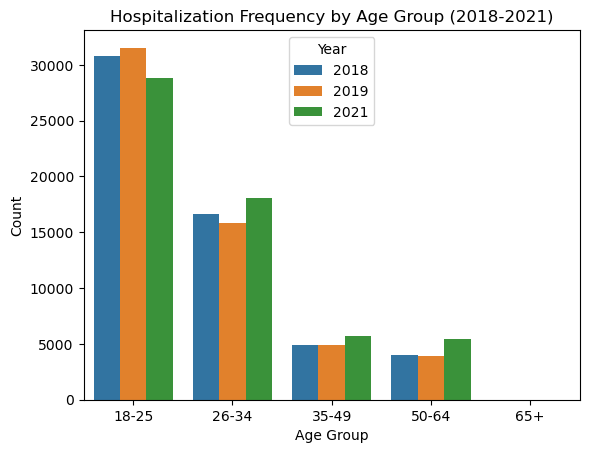

In [29]:
# Get column names in your DataFrame
print(NSDUH2021df.columns)
print(NSDUH2019df.columns)
print(NSDUH2018df.columns)

# Combine datasets with an extra column indicating the year
NSDUH2021df['year'] = 2021
NSDUH2019df['year'] = 2019
NSDUH2018df['year'] = 2018

combined_df = pd.concat([NSDUH2021df, NSDUH2019df, NSDUH2018df])

# Bar chart showing hospitalization by age group for each year
sns.countplot(x='age', hue='year', data=combined_df)
plt.title('Hospitalization Frequency by Age Group (2018-2021)')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Year')
plt.show()

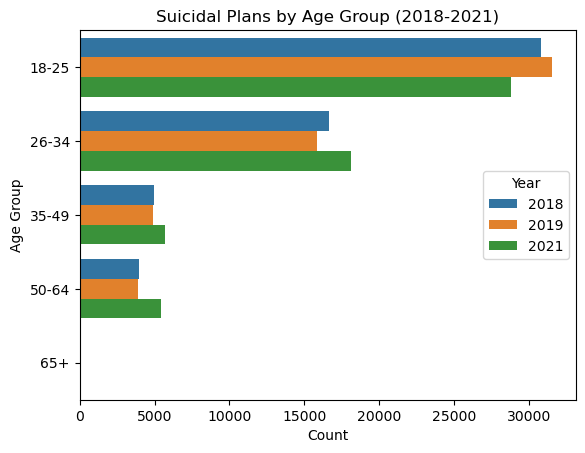

In [33]:
# Assuming the datasets are combined into a single data frame with a 'year' column
# Here, you can combine the datasets and add a 'year' column to each
NSDUH2021df['year'] = 2021
NSDUH2019df['year'] = 2019
NSDUH2018df['year'] = 2018

combined_df = pd.concat([NSDUH2021df, NSDUH2019df, NSDUH2018df])

# Horizontal bar chart showing suicidal plans by age group for each year
sns.countplot(y='age', hue='year', data=combined_df, orient='h')
plt.title('Suicidal Plans by Age Group (2018-2021)')
plt.xlabel('Count')
plt.ylabel('Age Group')
plt.legend(title='Year')
plt.show()


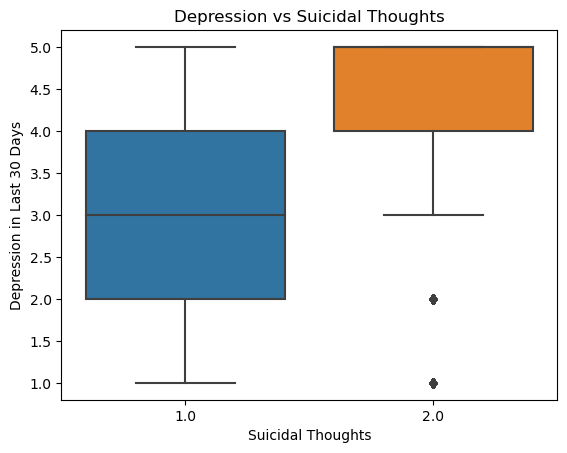

In [15]:
# Box plot for depression rates based on suicidal thoughts
sns.boxplot(x='suicidal_think', y='depressed_last30', data=NSDUH2021df)
plt.xlabel('Suicidal Thoughts')
plt.ylabel('Depression in Last 30 Days')
plt.title('Depression vs Suicidal Thoughts')
plt.show()



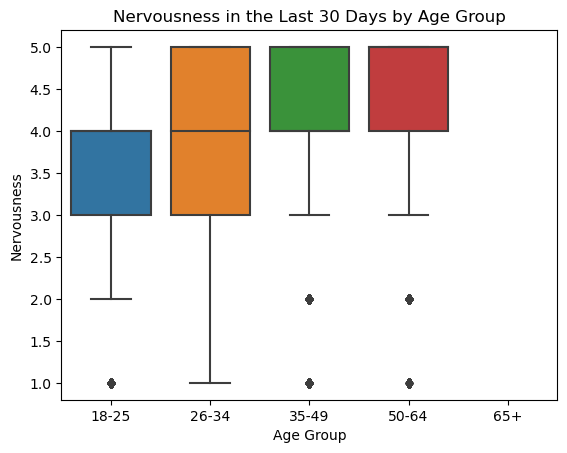

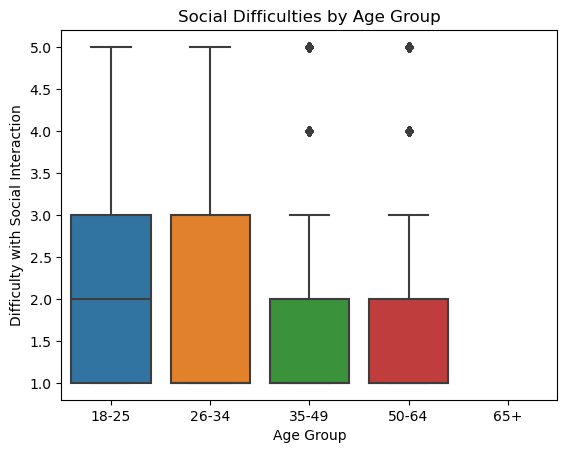

In [19]:
# Combine all dataframes
NSDUH_all = pd.concat([NSDUH2018df, NSDUH2019df, NSDUH2021df])

# Boxplot to show nervousness by age group
sns.boxplot(x='age', y='nervous_last30', data=NSDUH_all)
plt.title('Nervousness in the Last 30 Days by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Nervousness')
plt.show()

# Boxplot for social difficulties by age group
sns.boxplot(x='age', y='diff_social', data=NSDUH_all)
plt.title('Social Difficulties by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Difficulty with Social Interaction')
plt.show()

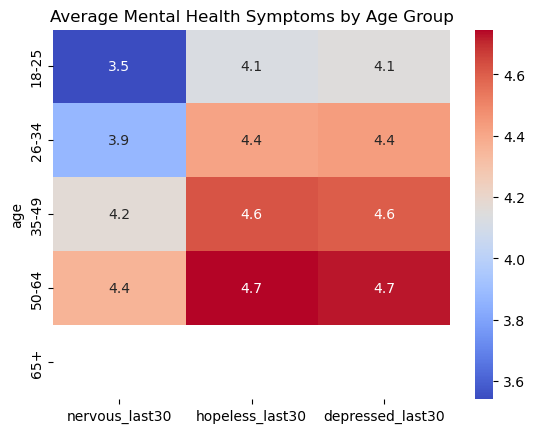

In [17]:
# Heatmap for correlation between age groups and various mental health symptoms
heatmap_data = NSDUH2021df[['age', 'nervous_last30', 'hopeless_last30', 'depressed_last30']].groupby('age').mean()
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Average Mental Health Symptoms by Age Group')
plt.show()

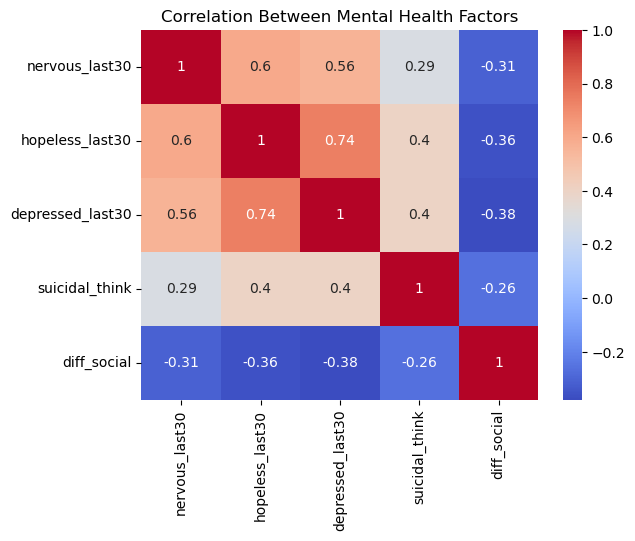

In [27]:
# Heatmap to show correlation between different mental health factors
correlation_matrix = NSDUH_all[['nervous_last30', 'hopeless_last30', 'depressed_last30', 
                                'suicidal_think', 'diff_social']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Mental Health Factors')
plt.show()


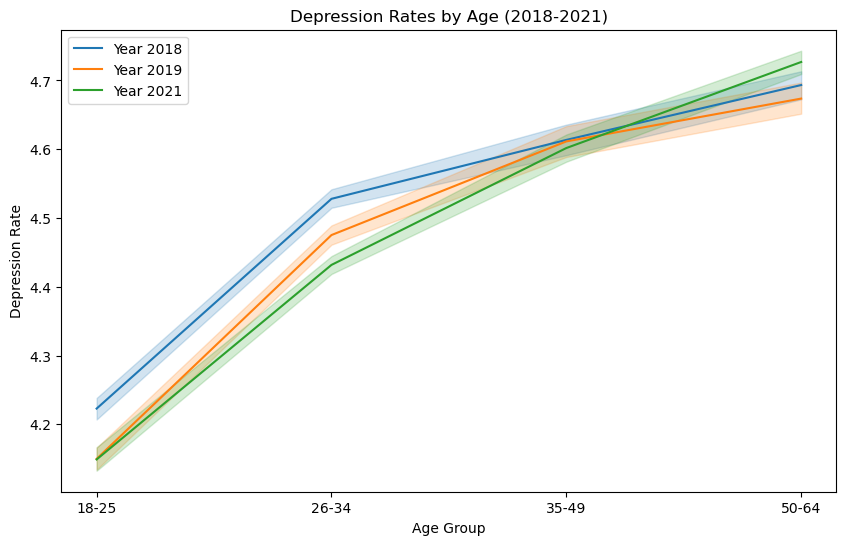

In [43]:
# Scatter Plot: Social Media Usage vs. Feelings of Worthlessness
plt.figure(figsize=(10, 6))
for year in [2018, 2019, 2021]:
    df = combined_df[combined_df['year'] == year]
    sns.lineplot(x='age', y='depressed_last30', label=f'Year {year}', data=df)
plt.title("Depression Rates by Age (2018-2021)")
plt.xlabel("Age Group")
plt.ylabel("Depression Rate")
plt.legend()
plt.show()


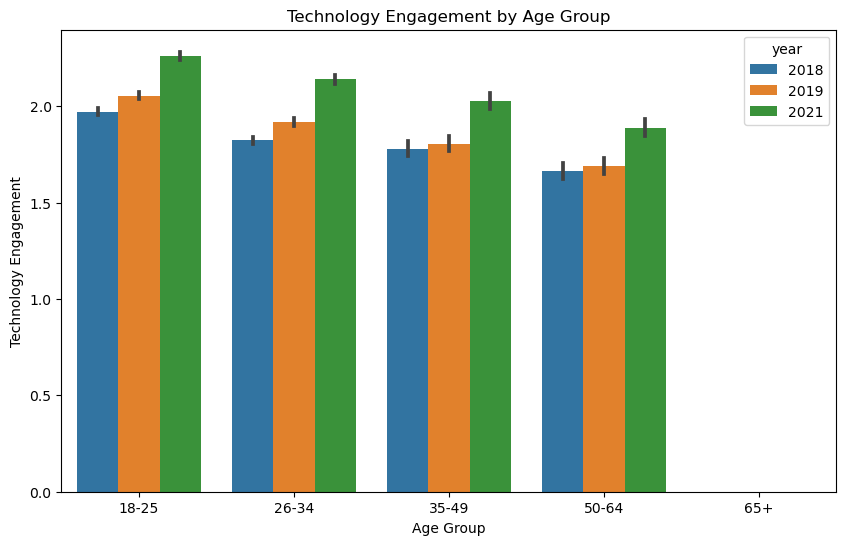

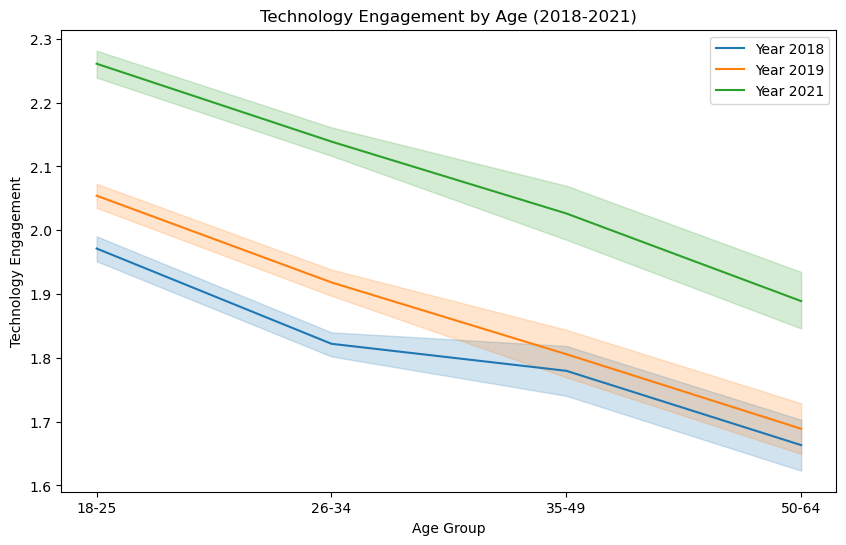

In [45]:
# Bar Graph: Technology Engagement by Age Group
plt.figure(figsize=(10, 6))
sns.barplot(x='age', y='diff_social', hue='year', data=combined_df)
plt.title("Technology Engagement by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Technology Engagement")
plt.show()

# Line Chart: Technology Engagement by Age
plt.figure(figsize=(10, 6))
for year in [2018, 2019, 2021]:
    df = combined_df[combined_df['year'] == year]
    sns.lineplot(x='age', y='diff_social', label=f'Year {year}', data=df)
plt.title("Technology Engagement by Age (2018-2021)")
plt.xlabel("Age Group")
plt.ylabel("Technology Engagement")
plt.legend()
plt.show()